In [148]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from data import get_drawdown_ath

In [4]:
url_glassnode = 'https://api.glassnode.com/v1/metrics/market/mvrv_z_score'
parameters = {
     'api_key' : '03d4ead5-ef03-43eb-86fd-777b7671fad2',
     'a' : 'BTC'
             }

In [5]:
data = requests.get(url  = url_glassnode, params = parameters).json()

In [101]:
price = get_drawdown_ath()[['price']]

date = []
MVRV_Z = []
for x in range(len(data)) : 
    date.append(data[x]['t'])
    MVRV_Z.append(data[x]['v'])
df = pd.DataFrame(date, columns = ['date'])
df['date'] = pd.to_datetime(df['date'], unit ='s')
df['mvrv_z'] = MVRV_Z
df.set_index('date', inplace = True)
df['price'] = price

In [103]:
reg = df[['mvrv_z']][:-1]
y = []
for x in range(len(df)-1) : 
    y.append(df['price'].iloc[x+1])
reg['y'] = y

diff = []
for i in range(1,len(df)) : 
    diff.append(df['price'].iloc[i] - df['price'].iloc[i-1])
reg['diff'] = diff

def is_up(x): 
    if x >= 0 :
        return 1
    elif x < 0 : 
        return 0
reg['is_up'] = reg['diff'].map(lambda x : is_up(x))  

/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mvrv_z', ylabel='y'>

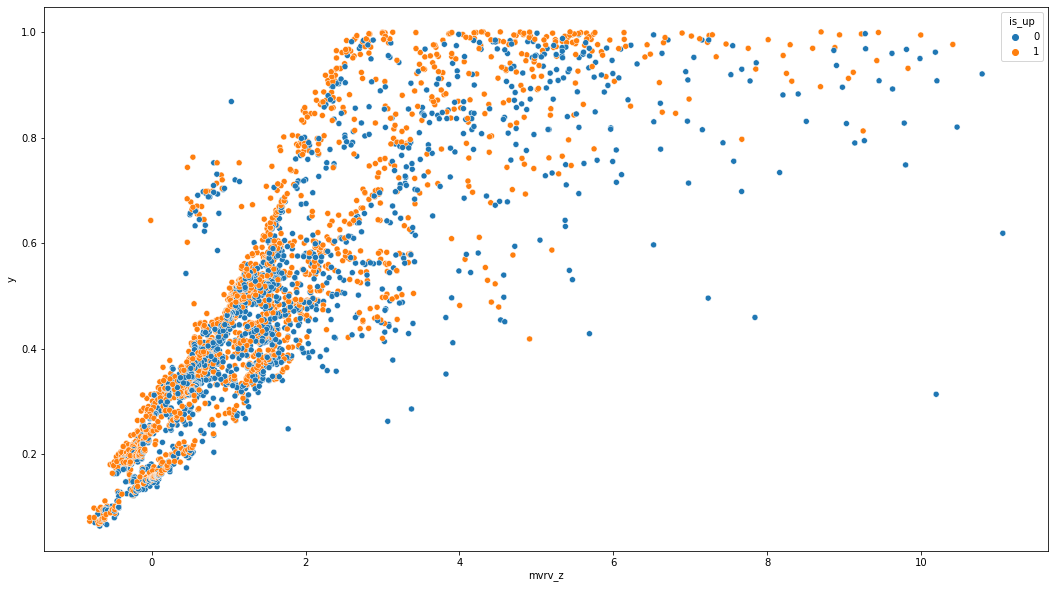

In [141]:
plt.figure(figsize = (18,10))
sns.scatterplot('mvrv_z', 'y', hue = 'is_up',data=reg)

/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mvrv_z', ylabel='diff'>

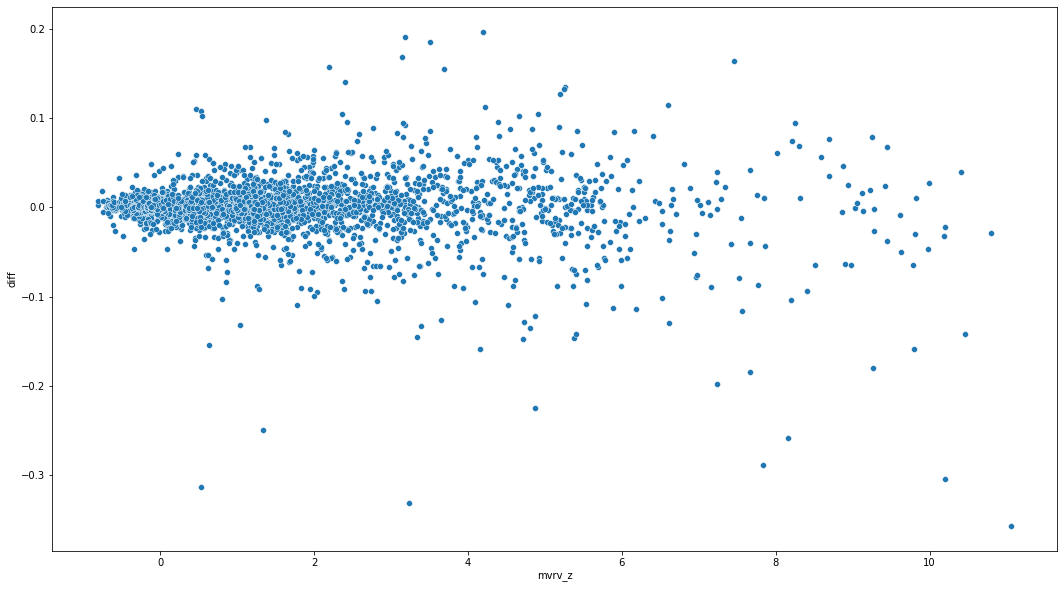

In [137]:
plt.figure(figsize = (18,10))
sns.scatterplot('mvrv_z', 'diff', data=reg)

In [162]:
diff_10 = []
for i in range(10,len(df)+9) : 
    if i < 3736 :
        diff_10.append(df['price'].iloc[i] - df['price'].iloc[i-10])
    else : 
        diff_10.append(np.nan)

In [166]:
reg['diff_10'] = diff_10
reg['is_up_10'] = reg['diff_10'].map(lambda x : is_up(x))  

/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mvrv_z', ylabel='y'>

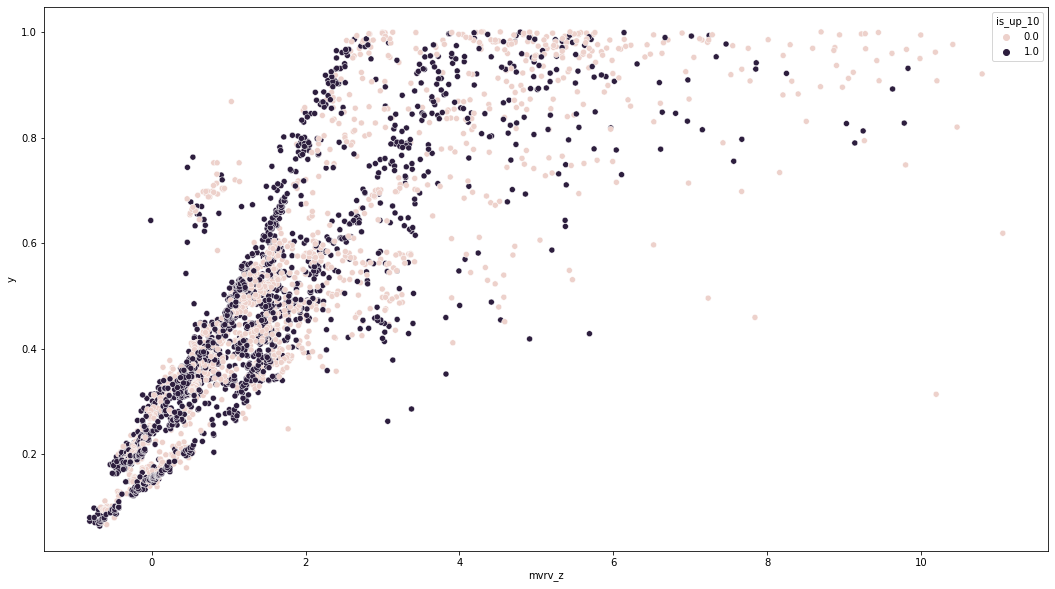

In [168]:
plt.figure(figsize = (18,10))
sns.scatterplot('mvrv_z', 'y', hue = 'is_up_10',data=reg)

/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mvrv_z', ylabel='diff_10'>

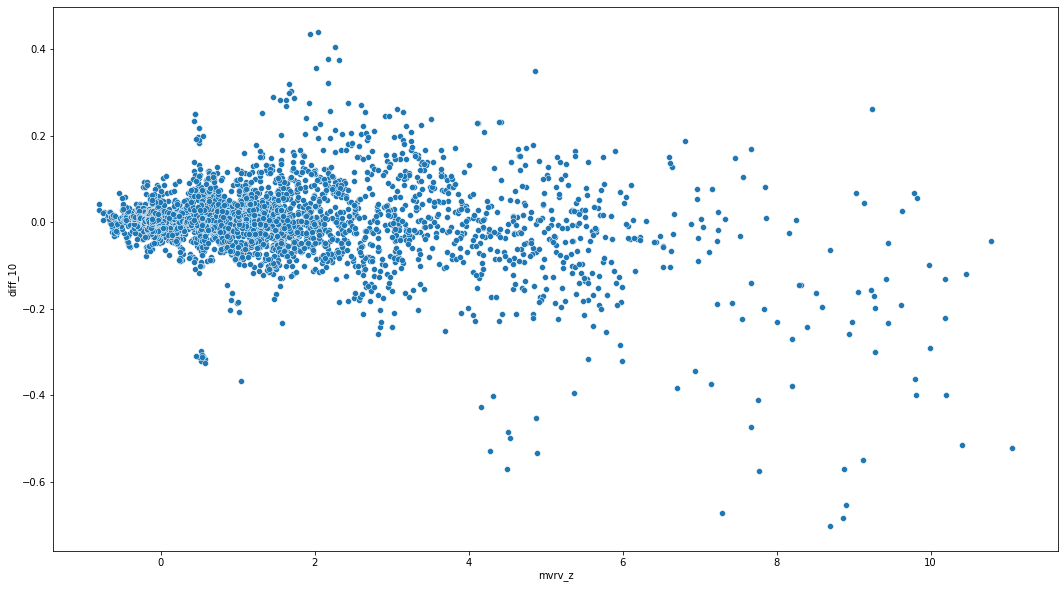

In [169]:
plt.figure(figsize = (18,10))
sns.scatterplot('mvrv_z', 'diff_10', data=reg)

In [171]:
diff_20 = []
for i in range(20,len(df)+19) : 
    if i < 3736 :
        diff_20.append(df['price'].iloc[i] - df['price'].iloc[i-20])
    else : 
        diff_20.append(np.nan)

reg['diff_20'] = diff_20
reg['is_up_20'] = reg['diff_20'].map(lambda x : is_up(x))          

/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mvrv_z', ylabel='y'>

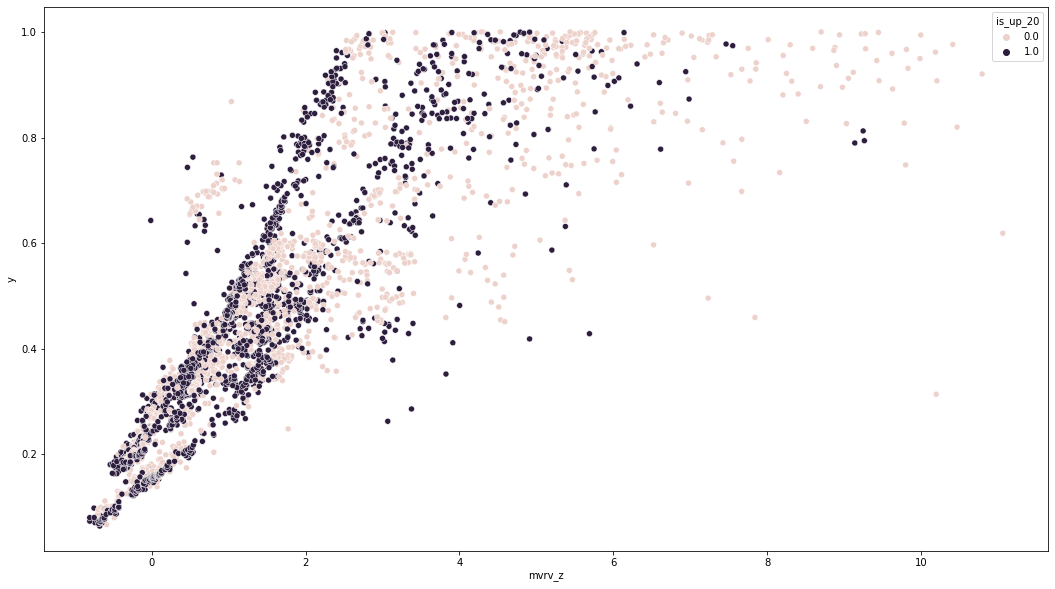

In [175]:
plt.figure(figsize = (18,10))
sns.scatterplot('mvrv_z', 'y', hue = 'is_up_20',data=reg)

/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mvrv_z', ylabel='diff_20'>

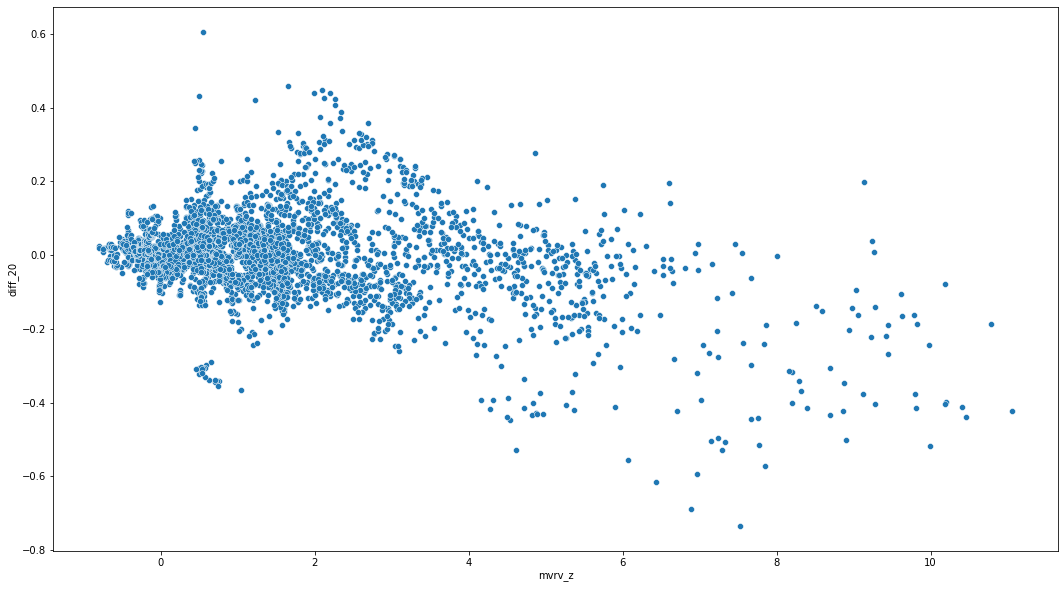

In [173]:
plt.figure(figsize = (18,10))
sns.scatterplot('mvrv_z', 'diff_20', data=reg)

### On voit que la corrélation est casiment nul lorsqu'on utilisé le mrvr-Z pour prédire si le mouvement du lendemain sera haussier ou bassier, cependant il semble qu'une petite tendance semble se dessiner lorsqu'on fit cela pour 10 jours puis pour 20 jours. L'idées serais de sectionner ces valeures en séquences pour feed le Lstm modèle en suivant cette idée les MRVR-z ration d'il y a 10 jours ou d'il y a 20 jours seraient surement connu du modèle de la taille des séquences. Cela semble donc pertinent, de plus içi on a limité notre analyse à 1 MVRV ratio, on a pas étudié le comportement de la courbe suite au enchainement de plusieurs valeures.